In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
def bisec_method(a,b,f,tol):
    fa,fb = f(a),f(b)
    if fa*fb<0:
        c = (a+b)/2.
        capproxs = np.array([c]) # build an array to record the estimates we make for the root
        fc = f(c)
        while np.abs(fc)>=tol:
            if fa*fc<0:
                b = c                
            else:
                fa = fc
                a = c
                
            c = (a+b)/2.    
            fc = f(c)
            #capproxs = np.append(capproxs,c)
            
        # print("Our root is: %1.15f" %c)
        return c
    else:
        print("Cannot ensure existence of root.")

In [6]:
def Newtons_method(f,fp,x0,tol):
    x1 = x0 - f(x0)/fp(x0)
    xapprox = np.array([x0,x1])
    while np.abs(x1-x0) >= tol :
        x0 = x1
        x1 = x0 - f(x0)/fp(x0)
        #xapprox = np.append(xapprox,x1)
    # print("Your root is: %1.15f" %x1)
    # rate_of_conv(xapprox)
    return x1

In [5]:
def secant_method(f,x0,x1,tol):
    f0 = f(x0)
    f1 = f(x1)
    x2 = x1 - f1*(x1-x0)/(f1-f0)
    #xapprox = np.array([x0,x1,x2])
    while np.abs(x2-x1)>=tol:
        x0 = x1
        x1 = x2
        f0 = f1
        f1 = f(x1)
        x2 = x1 - f1*(x1-x0)/(f1-f0)
        #xapprox = np.append(xapprox,x2)
    return x2

**Problem 1**: 10 pts - Here is a cubic polynomial with three closely spaced real roots:

$$
p(x) = 816x^3 - 3835x^2 + 6000x - 3125
$$

* What are the exact roots of p?
* Plot $p(x)$ for $1.43\leq x \leq 1.71$.  Show the location of the three roots.  
* Starting with $x_{0}=1.5$, what does Newton's method do?
* Starting with $x_{0}=1$ and $x_{1}=2$, what does the secant method do?
* Starting with the interval $[1,2]$, what does bisection do?

Newton's method produces: 1.470588235294096
The secant method produces: 1.666666666667267
The bisection method produces: 1.470588207244873


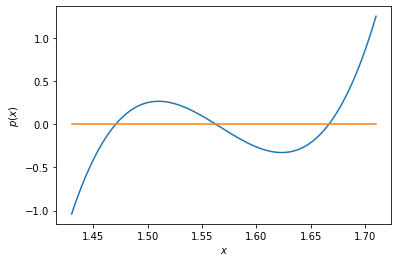

In [55]:
xvals = np.linspace(1.43,1.71,int(1e2)+1)
fvals = 816.*xvals**3. - 3835.*xvals**2. + 6000.*xvals - 3125.
plt.plot(xvals,fvals)
plt.plot(xvals,np.zeros(xvals.size))
plt.xlabel("$x$")
plt.ylabel("$p(x)$")

f = lambda x: 816.*x**3. - 3835.*x**2. + 6000.*x - 3125.
fp = lambda x: 3.*816.*x**2. - 2.*3835.*x + 6000.
tol = 1e-6

print("Newton's method produces: %1.15f"% Newtons_method(f,fp,1.5,tol))
print("The secant method produces: %1.15f"% secant_method(f,1.,2.,tol))
print("The bisection method produces: %1.15f"% bisec_method(1.,2.,f,tol))

So it seems that while there are three roots, the methods only find two of the three, and it is not immediately clear which will find which.  This sets up some of the difficulties we see in the next problem. 

**Problem 2**: 10 pts - Find the first ten positive values of $x$ such that $x = \tan(x)$.  Explain your choice of root finding method for doing this, and explain how you are certain that you have found the first ten positive values.  

A plot here is going to be super useful.

Text(0.5, 0, '$x$')

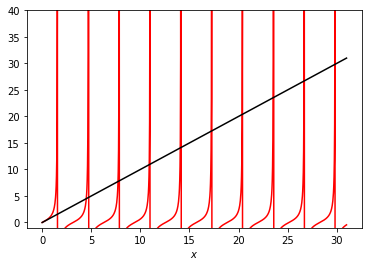

In [46]:
xvals = np.linspace(0.,31.,int(1e3)+1)
plt.plot(xvals,np.tan(xvals),color='r')
plt.plot(xvals,xvals,color='k')
plt.ylim([-1,40.])
plt.xlabel("$x$")

So we clearly see for $f(x) = \tan(x)-x$ that $x=0$ is a root.  After that and after $\pi/2$, it looks like we find a root just before every vertical asymptote of $\tan(x)$.  The asymptotes are $\pi$ apart.  So, given that we are working around points at which the function we're finding roots for isn't differentiable, using the bisection method seems like the safest choice.  We just need to be thoughtful about how we pick the two starting points.   

In [51]:
Pi = np.pi
dhl = .9
dhr = .999
a = dhl*3.*Pi/2.
b = dhr*3.*Pi/2.
tpi = 3.*Pi/2.
rts = np.zeros(9)
f = lambda x: np.tan(x)-x
tol = 1e-10

for jj in range(9):
    rts[jj] = bisec_method(a,b,f,tol)
    tpi += Pi
    a = dhl*tpi
    b = dhr*tpi
print(rts)

[ 4.49340946  7.72525184 10.90412166 14.06619391 17.22075527 20.37130296
 23.5194525  26.66605426 29.81159879]


Using the Bisection Method, we are able to get the remaining nine roots up to $10$-digits of accuracy.  

**Problem 3**: 10 pts - Suppose that we interpolate over three points, say $x_{j-1}$, $x_{j}$, $x_{j+1}$, with data $f_{j-1}$, $f_{j}$, and $f_{j+1}$, where our nodes are equally spaced so that 

$$
\delta x = x_{j+1} - x_{j} = x_{j} - x_{j-1}.
$$

Thus we can write 

$$
x_{j+1} = x_{j} + \delta x, ~ x_{j-1} = x_{j} - \delta x,
$$

As we discussed in class, for an unknown function $f(x)$, we can generate an interpolatory second-order approximation $P_{2}(x)$, $f(x)\approx P_{2}(x)$, where

$$
P_{2}(x) = f_{j-1}\frac{(x-x_{j})(x-x_{j+1})}{(x_{j-1}-x_{j})(x_{j-1}-x_{j+1})} + f_{j}\frac{(x-x_{j-1})(x-x_{j+1})}{(x_{j}-x_{j-1})(x_{j}-x_{j+1})} + f_{j+1}\frac{(x-x_{j-1})(x-x_{j})}{(x_{j+1}-x_{j-1})(x_{j+1}-x_{j})}
$$

Show that 

* (4pts) $P_{2}(x) = \frac{1}{2\delta x^{2}}\left(f_{j-1}\tilde{x}(\tilde{x}-\delta x) - 2f_{j}(\tilde{x}-\delta x)(\tilde{x}+\delta x) + f_{j+1}\tilde{x}(\tilde{x}+\delta x)\right)$, $\tilde{x} = x-x_{j}$.

* (3pts) $P'_{2}(x_{j}) = \frac{1}{2\delta x}\left(f_{j+1} - f_{j-1} \right)$.  Letting $f'(x_{j})\approx P'_{2}(x_{j})$ is known as a _centered difference_ approximation to a derivative of a function.

* (3pts) $P''_{2}(x_{j}) = \frac{1}{\delta x^{2}}\left(f_{j+1} - 2f_{j} + f_{j-1}\right)$

Using $x-x_{j+1} = \tilde{x} - \delta x$ and $x-x_{j-1} = \tilde{x} + \delta x$, we readily get the first formula.  Differentiating then with respect to $\tilde{x}$ and then setting $\tilde{x}=0$, we find the next two formulas readily.  

**Problem 4**: 10 pts 
* (3 pts) Using $f(x) = \cos(x)$, determine the accuracy of your centered difference approximations for $f'(x_{j})$ and $f''(x_{j})$ with respect to the magnitude of $\delta x$.  In other words, if we suppose that 
$$
f'(x_{j}) = \frac{f_{j+1}-f_{j-1}}{2\delta x} + C\delta x^{p},
$$
then find $p$.  Note, in order to measure the error in our approximations, we look at points $x_{j}\in[0, 2\pi]$ where $\delta x = 2\pi/N$ so that
$$
x_{j} = \frac{2\pi j}{N}, ~j=0, \cdots, N.
$$
We plot the maximum of the absolute value of the error in our approximation over our chosen interval for increasing choices of $N$.

* (3 pts) Using $P_{4}(x)$, derive a centered difference approximation for $f'(x_{j})$ using the equally spaced nodes $x_{j-2}$, $x_{j-1}$, $x_{j}$, $x_{j+1}$, $x_{j+2}$, with corresponding node spacing $\delta x$, and corresponding data $f_{j-2}$, $f_{j-1}$, $f_{j}$, $f_{j+1}$, $f_{j+2}$.  Note, you'll need to first show that 
\begin{multline}
P_{4}(x) = \frac{1}{(\delta x)^{4}}\left(\frac{f_{j-2}}{4!}(\tilde{x}+\delta x)\tilde{x}(\tilde{x}-\delta x)(\tilde{x}-2\delta x) -\frac{f_{j-1}}{3!}(\tilde{x}+2\delta x)\tilde{x}(\tilde{x}-\delta x)(\tilde{x}-2\delta x) + \frac{f_{j}}{4}(\tilde{x}+2\delta x)(\tilde{x}+\delta x)(\tilde{x}-\delta x)(\tilde{x}-2\delta x)\right.\\
\left.-\frac{f_{j+1}}{3!}(\tilde{x}+2\delta x)(\tilde{x}+\delta x)\tilde{x}(\tilde{x}-2\delta x)+ \frac{f_{j+2}}{4!}(\tilde{x}+2\delta x)(\tilde{x}+\delta x)\tilde{x}(\tilde{x}-\delta x)\right)
\end{multline}
where again $\tilde{x}=x-x_{j}$.  I know this looks nasty, but if you see the underlying pattern, it's not nearly as bad.

* (4 pts) Determine the order of accuracy of your five point approximation again using $f(x) = \cos(x)$ using the same approach you used in the first part of this problem.  



Again, as above, to differentiate $P_{4}(x)$, we differentiate with respect to $\tilde{x}$ and then set it to zero which gives us

$$
\left.\frac{d}{dx}P_{4}(x)\right|_{x=x_{j}} = \frac{1}{\delta x}\left(\frac{1}{12}f_{j-2}-\frac{2}{3}f_{j-1} + \frac{2}{3}f_{j+1} - \frac{1}{12}f_{j+2}\right)
$$

In [83]:
def dfdx(fvals,dx):
    nterms = xvals.size
    return (fvals[2:]-fvals[0:nterms-2])/(2.*dx)

def dfdxho(fvals,dx):
    nterms = xvals.size
    a = 1./12.
    b = 2./3.
    return (-a*fvals[4:] + b*fvals[3:nterms-1] - b*fvals[1:nterms-3] + a*fvals[0:nterms-4])/dx

def dfdx2(fvals,dx):
    nterms = xvals.size
    return (fvals[2:]-2.*fvals[1:nterms-1]+fvals[0:nterms-2])/(dx**2.)

Nvals = np.array([1e1,1e2,1e3,1e4])
errlodfdx = np.zeros(Nvals.size)
errlodfdx2 = np.zeros(Nvals.size)
errlodfdxho = np.zeros(Nvals.size)

for jj in range(Nvals.size):
    nterms = int(Nvals[jj])+1
    xvals = np.linspace(0.,2.*np.pi,nterms)
    fvals = np.cos(xvals)
    dfdxt = -np.sin(xvals)
    dfdx2t = -np.cos(xvals)
    
    dx = 2.*np.pi/(nterms-1)
    
    errlodfdx[jj] = np.log10(np.max(np.abs(dfdx(fvals,dx)-dfdxt[1:nterms-1])))
    errlodfdxho[jj] = np.log10(np.max(np.abs(dfdxho(fvals,dx)-dfdxt[2:nterms-2])))
    errlodfdx2[jj] = np.log10(np.max(np.abs(dfdx2(fvals,dx)-dfdx2t[1:nterms-1])))
    

Text(0.5, 1.0, 'Second order Centered Difference Approximation of First Derivative')

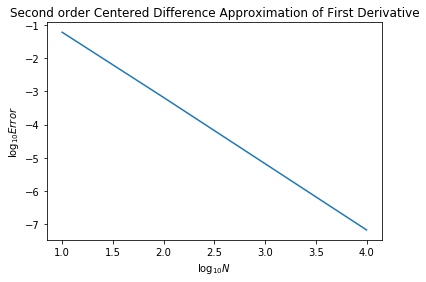

In [84]:
plt.plot(np.log10(Nvals),errlodfdx)
plt.xlabel("$\log_{10} N$")
plt.ylabel("$\log_{10} Error$")
plt.title("Second order Centered Difference Approximation of First Derivative")

Text(0.5, 1.0, 'Second order Centered Difference Approximation of Second Derivative')

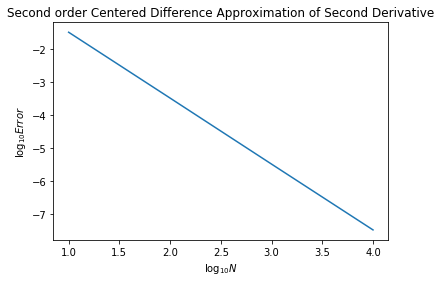

In [85]:
plt.plot(np.log10(Nvals),errlodfdx2)
plt.xlabel("$\log_{10} N$")
plt.ylabel("$\log_{10} Error$")
plt.title("Second order Centered Difference Approximation of Second Derivative")

Text(0.5, 1.0, 'Fifth order Centered Difference Approximation of First Derivative')

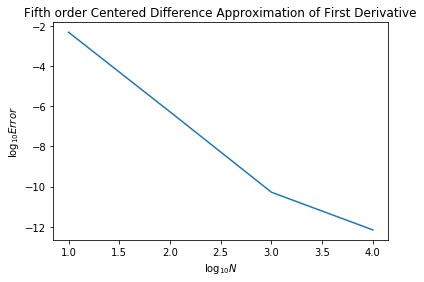

In [86]:
plt.plot(np.log10(Nvals),errlodfdxho)
plt.xlabel("$\log_{10} N$")
plt.ylabel("$\log_{10} Error$")
plt.title("Fifth order Centered Difference Approximation of First Derivative")